In [1]:
# importing libraries 
import pandas as pd
from visualisations import ScipiVisual 
from IPython.core.display import display

In [2]:
# initialize a new instance for ScipiVisual & set environment 
cassandra_points = ["localhost"] 
visual = ScipiVisual(cassandra_points=cassandra_points)

## Dynamics in Publication Networks 

,Single authored,Joint authored,Total Publications,% of Single authored publications,% of Joint authored publications
year,,,,,
1999,173,619,792,21.84,78.16
2000,196,659,855,22.92,77.08
2001,182,647,829,21.95,78.05
2002,198,695,893,22.17,77.83
2003,205,790,995,20.6,79.4
2004,207,840,1047,19.77,80.23
2005,232,953,1185,19.58,80.42
2006,223,1003,1226,18.19,81.81
2007,265,1204,1469,18.04,81.96


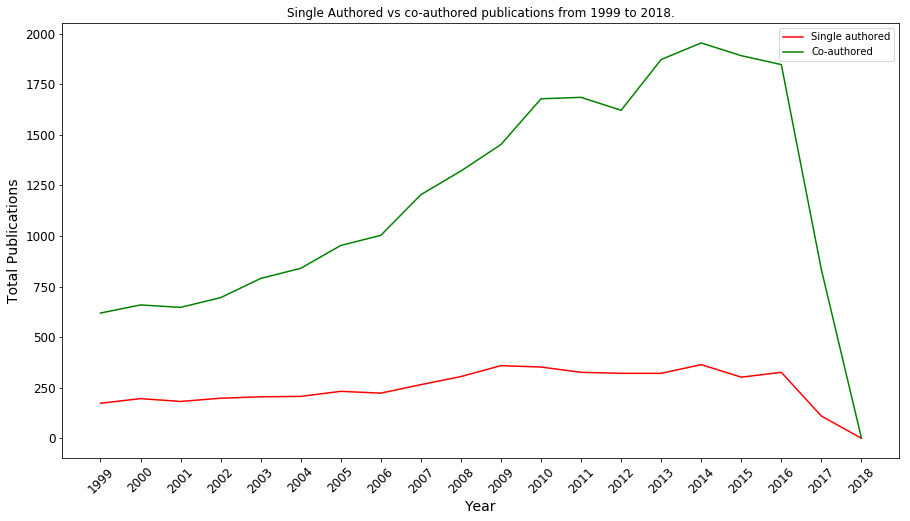

In [3]:
# plot year-wise distribution single author vs co-authored 
n_years = 20
visual.plot_yr_dist_pub(years=n_years)